In [40]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict,Annotated
from langchain_core.messages import HumanMessage,BaseMessage
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from langgraph.graph.message import add_messages
from langgraph.checkpoint.memory import MemorySaver

In [22]:
load_dotenv()

True

In [23]:
model=ChatOpenAI(model="openai/gpt-4.1-nano",base_url="https://openrouter.ai/api/v1")

In [24]:
class ChatBot(TypedDict):
    message:Annotated[list[BaseMessage],add_messages] #add_message is reducer fn like operator.add but is buit in langgraph for spec. purpose

In [25]:
def chat_node(state:ChatBot)->ChatBot:
    messages=state["message"]
    state["message"]=[model.invoke(messages)]
    return state

In [41]:
checkpoint=MemorySaver()

graph = StateGraph(ChatBot)

graph.add_node("chat_node",chat_node)

In [42]:
graph.add_edge(START,"chat_node")
graph.add_edge("chat_node",END)

In [43]:
workflow=graph.compile(checkpointer=checkpoint)

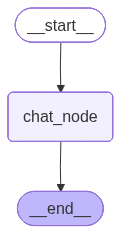

In [44]:
workflow

In [30]:
inital_state={
    "message":[HumanMessage(content="What is the capital of isle of man")]
}

In [35]:
workflow.invoke(inital_state)["message"]

[HumanMessage(content='What is the capital of isle of man', additional_kwargs={}, response_metadata={}, id='2a28aafc-ae62-4165-8e16-d0eb09a0ed24'),
 AIMessage(content='The capital of the Isle of Man is Douglas.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 15, 'total_tokens': 26, 'completion_tokens_details': {'accepted_prediction_tokens': None, 'audio_tokens': None, 'reasoning_tokens': 0, 'rejected_prediction_tokens': None, 'image_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}, 'cost': 5.9e-06, 'is_byok': False, 'cost_details': {'upstream_inference_cost': 5.9e-06, 'upstream_inference_prompt_cost': 1.5e-06, 'upstream_inference_completions_cost': 4.4e-06}}, 'model_provider': 'openai', 'model_name': 'openai/gpt-4.1-nano', 'system_fingerprint': None, 'id': 'gen-1768579150-U5PWzAwIl0CqZSC8nBu7', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019bc788-3480-7423-8bf9-9909435a26c0-0

In [45]:
thread_id="1"

while(True):
    user_message = input("type here")
    print("user: ",user_message)
    if user_message.strip().lower() in ["exit","bye","quit"]:
        print("bye bye!")
        break
    config={"configurable":{"thread_id":thread_id}}
    res=workflow.invoke({"message":[HumanMessage(content=user_message)]},config=config)
    print("AI:",res["message"][-1].content)

user:  hi i am avnish
AI: Hi Avnish! How can I assist you today?
user:  what is my name
AI: Your name is Avnish. How can I help you today?
user:  What is Rl
AI: "RL" can stand for different things depending on the context. Some common meanings include:

1. **Reinforcement Learning**: A type of machine learning where an agent learns to make decisions by receiving rewards or penalties.
2. **Real Life**: Referring to everyday life situations.
3. **Round Length**: Used in sports or gaming contexts.
4. **Rate Limit**: In networking or API contexts, referring to restrictions on the number of requests.

Could you please specify the context in which you're referring to "RL"? That way, I can provide a more accurate explanation.
user:  where was it started
AI: If you're referring to **Reinforcement Learning (RL)**, it has its roots in the early 20th century with foundational ideas in behaviorist psychology, but as a formal field of study, it was developed in the mid-20th century.

**Key mileston

In [46]:
workflow.get_state(config=config)

StateSnapshot(values={'message': [HumanMessage(content='hi i am avnish', additional_kwargs={}, response_metadata={}, id='ca345b53-cc55-4bd8-85e8-4f6af754a12f'), AIMessage(content='Hi Avnish! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 13, 'prompt_tokens': 13, 'total_tokens': 26, 'completion_tokens_details': {'accepted_prediction_tokens': None, 'audio_tokens': None, 'reasoning_tokens': 0, 'rejected_prediction_tokens': None, 'image_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}, 'cost': 6.5e-06, 'is_byok': False, 'cost_details': {'upstream_inference_cost': 6.5e-06, 'upstream_inference_prompt_cost': 1.3e-06, 'upstream_inference_completions_cost': 5.2e-06}}, 'model_provider': 'openai', 'model_name': 'openai/gpt-4.1-nano', 'system_fingerprint': None, 'id': 'gen-1768581686-tWnmBjIYMA97ZCXHcEvf', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019bc7ae-e3fe-7e12-b4a2-7a04ff